# False AWS Key Detection using Logistic Regression

## Detecting whether the given Input is False AWS Key or Not


### Necessary Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import metrics
%matplotlib inline

### Reading the dataset 

In [30]:
dataset = pd.read_csv('Test.csv')
dataset.head()

,Data,Label
0,7440/nexus/content/repositories/releases,Invalid
1,FinancialIdentificationSchemeName2Choice,Invalid
2,Bcom/dbs/itt/cd2fi/cdm/utils/ParamHelper,Invalid
3,getAssetsAndLiabilitiesLevelOneSummaryV2,Invalid
4,mapToEstablishCommunicationWithNullValues,Invalid


### Plot to analyse how many entries are there

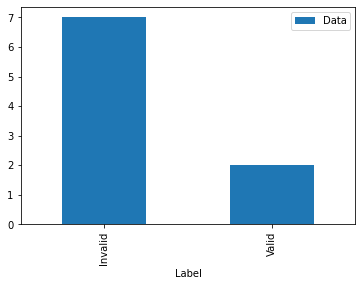

In [31]:
dataset.groupby('Label').count().plot.bar(ylim=0)
plt.show()

### Creating a vectorizer 
#### Converting the data into an array to do feature extraction

In [32]:
vectorizer = TfidfVectorizer(min_df= 1,max_df = 10, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['Data'].values.astype('U')).toarray()
final_features.shape

(9, 49)

## Taking the features from the Dataset to train the Model 

In [34]:
X = dataset['Data']
Y = dataset['Label']
X_train, X_test, y_train,y_test= train_test_split(X, Y,test_size=0.5)


# Printing the X_train and Y_train
print(len(X_train))
print(len(y_train))

4
4


## Creating the Classifier logreg
#### Here Logisitc Regression is used as a classifier to classify the features
#### CV - Cross Validation to avoid Overfitting of Model


In [39]:
logreg = LogisticRegressionCV(cv =3,random_state=0)
pipeline = Pipeline([('vect', vectorizer),
                         ('chi',  SelectKBest(chi2, k='all')),
                         ('clf', logreg)])

model = pipeline.fit(X_train.astype('U'), y_train.astype('U'))
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)


ytest = np.array(y_test)

C:\Users\raghu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


## Printing the Classification Report ( Precision, Recall, Accuracy, Max AVG, Min AVG)

In [36]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest.astype('U'), model.predict(X_test.astype('U'))))
cf_matrix = confusion_matrix(ytest.astype('U'), model.predict(X_test.astype('U')))
print(confusion_matrix(ytest.astype('U'), model.predict(X_test.astype('U'))))

              precision    recall  f1-score   support

     Invalid       0.80      1.00      0.89         4
       Valid       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

[[4 0]
 [1 0]]


C:\Users\raghu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raghu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raghu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

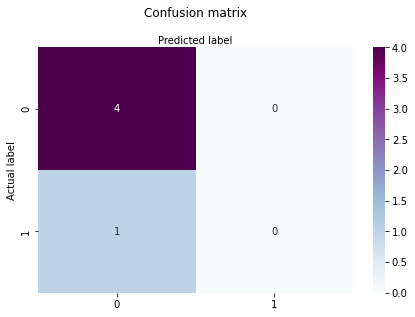

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Testing the Model with the custom Input


In [40]:
def trainmodel(X_training,Y_training):
    logreg = LogisticRegressionCV(cv = 5,random_state=0)
    pipeline = Pipeline([('vect', vectorizer),
                             ('chi',  SelectKBest(chi2, k='all')),
                             ('clf', logreg)])

    model = pipeline.fit(X_training.astype('U'), Y_training.astype('U'))
    with open('LogisticRegression.pickle', 'wb') as f:
        pickle.dump(model, f)


    ytest = np.array(Y_training)
    target_names=['Invalid Data','Valid Data']
    print(classification_report(ytest.astype('U'), model.predict(X_training.astype('U')),target_names=target_names,zero_division=0))
    cf_matrix = confusion_matrix(ytest.astype('U'), model.predict(X_training.astype('U')))
    print(confusion_matrix(ytest.astype('U'), model.predict(X_training.astype('U'))))
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="BuPu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return ytest


In [41]:
training_set = pd.read_csv("Test.csv")
training_set.head()

,Data,Label
0,7440/nexus/content/repositories/releases,Invalid
1,FinancialIdentificationSchemeName2Choice,Invalid
2,Bcom/dbs/itt/cd2fi/cdm/utils/ParamHelper,Invalid
3,getAssetsAndLiabilitiesLevelOneSummaryV2,Invalid
4,mapToEstablishCommunicationWithNullValues,Invalid


In [12]:
# training_set.loc[3] = ['SFSupplierOverdueViewCsvReportingService','Invalid']
# training_set.head()

,Data,Label
0,bvr60VqMlA3cwzLgHcCdceB0MW5PAHMWgdTtpeR8,Invalid
1,IZG3vmUAUCXfnw0Kpv6WfwxztvwXDOtaIswGy1UB,Invalid
2,35fjNsxEVIjkaf+m907BlFCxSB4EclVN5cYllmoY,Invalid
3,SFSupplierOverdueViewCsvReportingService,Invalid
4,NaN,NaN


# The Final Classification Report

              precision    recall  f1-score   support

Invalid Data       0.78      1.00      0.88         7
  Valid Data       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9

[[7 0]
 [2 0]]
0       7440/nexus/content/repositories/releases
1       FinancialIdentificationSchemeName2Choice
2       Bcom/dbs/itt/cd2fi/cdm/utils/ParamHelper
3       getAssetsAndLiabilitiesLevelOneSummaryV2
4    mapToEstablishCommunicationWithNullValues  
5        com/stigmata/server/base/NdServiceAgent
6        com/dbs/into/basegen/model/PIIDetails  
7       bXyTQCB6lNFNNDAxGrX/WfnYwE4/7HCF4tzr78Di
8       o2J9vY8OMAwUgeD/TLZhI0VU7iuRPS4OH2c1TdA3
Name: Data, dtype: object
['Invalid' 'Invalid' 'Invalid' 'Invalid' 'Invalid' 'Invalid' 'Invalid'
 'Valid' 'Valid']


C:\Users\raghu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


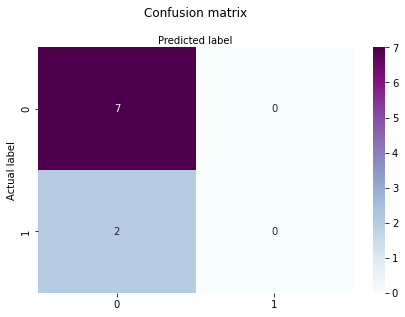

In [46]:
X_training = training_set['Data']
Y_training = training_set['Label']
# print(Y_training)
testvalue =trainmodel(X_training,Y_training)
# print(testvalue)
print(X_training)
print(testvalue)